# Subway's Review Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
#Windows

review_data = pd.read_csv(r"C:\Users\Computer\Desktop\Master\Completed\BANA 5440 Statistical Programming in Python\Python\Subway Reviews - Visualization\Data\reviews.csv")

restraunts = pd.read_csv(r"C:\Users\Computer\Desktop\Master\Completed\BANA 5440 Statistical Programming in Python\Python\Subway Reviews - Visualization\Data\restaurants.csv")

In [ ]:
#Mac
review_data = pd.read_csv(r"/Users/liudingkang/Desktop/Python projects/reviews.csv")

restraunts = pd.read_csv(r"/Users/liudingkang/Desktop/Python projects/restaurants.csv")

In [7]:
review_data

,Unnamed: 0,review_id,user_id,business_id,stars,date
0,0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30
1,1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2.0,2015-09-10 02:41:13
2,2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5.0,2017-08-18 01:42:46
3,3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5.0,2015-09-26 16:13:09
4,4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3.0,2015-06-22 16:08:27
...,...,...,...,...,...,...
432916,432916,qMMSJ2se0-G-V9K7y96EbQ,a4wr0eMRHjFqI66JoGpXog,Tj9FmBCHd84kjAE9vcoBnw,1.0,2018-04-06 01:19:30
432917,432917,WooR8MihE_bJ3qnYbDjizw,-MZSr4VErbuvzm8c5z2gbQ,Tj9FmBCHd84kjAE9vcoBnw,2.0,2018-04-01 04:36:21
432918,432918,QLVR6EcBV2lD2JpJrP9N_Q,k5RiHhMsd7zT6gO-sa8CiQ,Tj9FmBCHd84kjAE9vcoBnw,1.0,2021-10-13 22:33:23
432919,432919,cf3ft8457oGoiu9rW49cDQ,cS5J5Lw1xECApPjmk6dyJg,Tj9FmBCHd84kjAE9vcoBnw,1.0,2021-11-03 18:05:23


# Question 1

In [8]:
# Question 1
# Left joined review data sheet and the restraunts data sheet using the Business_id as the key, named rvw_name. 
# Summaries the rvw_name so that we only look at the stars and the name of the restraunts.

In [9]:
rvw_name = pd.merge(review_data, restraunts[['business_id','name', 'state']], how = 'left', on = 'business_id')

rvw_name['year'] = pd.to_datetime(rvw_name['date']).dt.year

sub_ratings = rvw_name.loc[rvw_name['name'] == 'Subway']

rating_trend = pd.DataFrame(sub_ratings.groupby(["year"], as_index=False).stars.mean())

In [10]:
# Visualization for part A (1_A)

# Construct a plot with year on the x-axis and average rating received on the primary y-axis.
# Plot a bar chart of number of ratings received on the secondary y- axis.

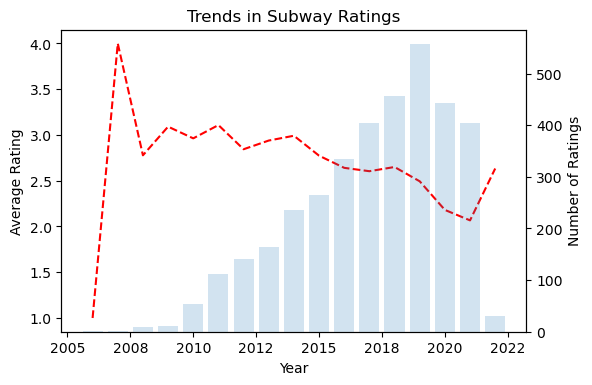

In [11]:
y1 = rating_trend['stars']

y2 = sub_ratings['stars'].groupby(sub_ratings['year']).agg('count')

fig, ax = plt.subplots(dpi = 100)

ax.plot(rating_trend['year'],y1, 'r--')

ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f')) 
#This will format the axis

ax.set_xlabel('Year')

ax.set_ylabel('Average Rating')

ax.set_title('Trends in Subway Ratings')

ax2 = ax.twinx()

ax2.bar(rating_trend['year'],y2, alpha = 0.2)

ax2.set_ylabel('Number of Ratings')

plt.show()

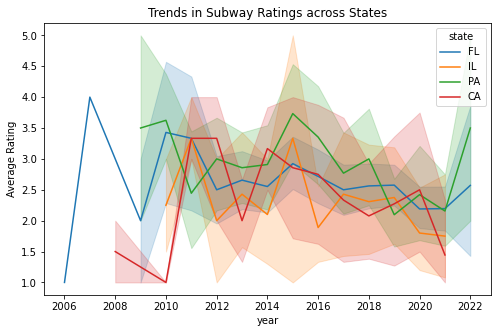

In [12]:
# Visualization for part B (1_B)
# I made a plot chart bases on the average rating from FL, IL, PA, CA to see if there is any trend in Subway rating across States.

states = ['FL', 'CA', 'PA', 'IL']

sub_state = sub_ratings.loc[sub_ratings['state'].isin(states)]

#figure1_b = plt.subplots(dpi = 120)

figure1_b = plt.figure(figsize=(8, 5))

figure1_b = sns.lineplot(x='year', y='stars',hue ='state', data = sub_state)

figure1_b.set_xlabel('year')

figure1_b.set_ylabel('Average Rating')

figure1_b.set_title("Trends in Subway Ratings across States");



# Question 2 

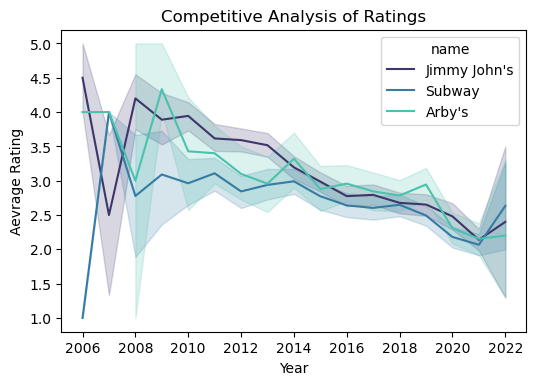

In [13]:
#Question 2 
# Identify one or two national competitors of Subway. Create a plot to compare 
# the mean and standard deviation of reviews received by Subway with its competitors.

shops = ["Arby's", "Jimmy John's", 'Subway']

sub_sand =  rvw_name.loc[rvw_name['name'].isin(shops)]

# OR use "|" competion = rvw_name.loc[(rvw_name['name'] == "Jimmy John's")|(rvw_name['name'] == "Subway")|(rvw_name['name'] == "Arby's")]

#Figure2_1

figure2_1 = plt.subplots(dpi = 100)

figure2_1 = sns.lineplot(y='stars', x = 'year', data = sub_sand, hue='name', palette='mako')

figure2_1.set_xlabel("Year")

figure2_1.set_ylabel("Aevrage Rating")

figure2_1.set_title('Competitive Analysis of Ratings');




# Question 3

In [14]:
#Categorize restaurants with a presence in more than 50 cities as national chains and a presence in only one city as local. Construct a plot to compare 
#ratings received by national chains and local chains

cities = pd.DataFrame(restraunts.groupby(['name'], as_index=False).city.nunique())

#cities['national'] = cities['city'] >50 == True 

#Adding a pd column with more complicated conditions using np.select

conditions = [(cities['city']) == 1, (cities['city'] > 50)]

values = ['local', 'national']

cities['national'] = np.select(conditions, values)

cities = pd.merge(rvw_name,cities,how='left',on='name')

cities

,Unnamed: 0,review_id,user_id,business_id,stars,date,name,state,year,city,national
0,0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Kettle Restaurant,AZ,2014,1,local
1,1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2.0,2015-09-10 02:41:13,Kettle Restaurant,AZ,2015,1,local
2,2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5.0,2017-08-18 01:42:46,Kettle Restaurant,AZ,2017,1,local
3,3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5.0,2015-09-26 16:13:09,Kettle Restaurant,AZ,2015,1,local
4,4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3.0,2015-06-22 16:08:27,Kettle Restaurant,AZ,2015,1,local
...,...,...,...,...,...,...,...,...,...,...,...
432916,432916,qMMSJ2se0-G-V9K7y96EbQ,a4wr0eMRHjFqI66JoGpXog,Tj9FmBCHd84kjAE9vcoBnw,1.0,2018-04-06 01:19:30,KFC,AB,2018,82,national
432917,432917,WooR8MihE_bJ3qnYbDjizw,-MZSr4VErbuvzm8c5z2gbQ,Tj9FmBCHd84kjAE9vcoBnw,2.0,2018-04-01 04:36:21,KFC,AB,2018,82,national
432918,432918,QLVR6EcBV2lD2JpJrP9N_Q,k5RiHhMsd7zT6gO-sa8CiQ,Tj9FmBCHd84kjAE9vcoBnw,1.0,2021-10-13 22:33:23,KFC,AB,2021,82,national
432919,432919,cf3ft8457oGoiu9rW49cDQ,cS5J5Lw1xECApPjmk6dyJg,Tj9FmBCHd84kjAE9vcoBnw,1.0,2021-11-03 18:05:23,KFC,AB,2021,82,national


In [15]:
from matplotlib.ticker import FormatStrFormatter

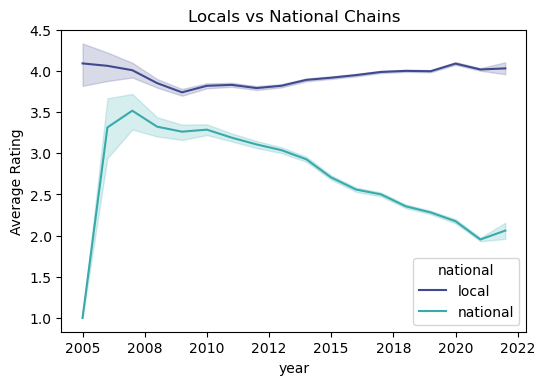

In [16]:
# figure 3
figure3 = plt.subplots(dpi = 100)

figure3 = sns.lineplot(data = cities,y='stars', x = 'year', hue='national', palette='mako')

figure3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

figure3.set_xlabel('year')

figure3.set_ylabel('Average Rating')

figure3.set_title("Locals vs National Chains");


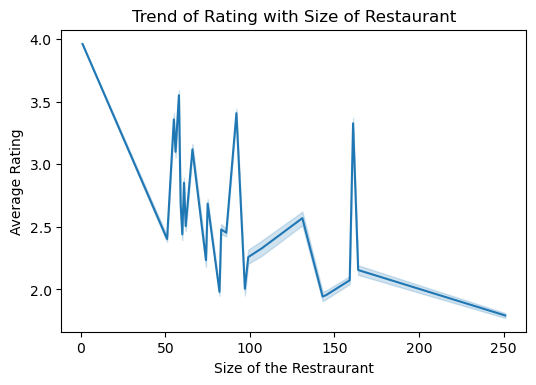

In [17]:
# Question 2 Part B Trend of rating with size of Restraurant

figure3_2 = plt.subplots(dpi =100)

figure3_2 = sns.lineplot(data = cities, x = 'city', y= 'stars')

figure3_2.set_xlabel('Size of the Restraurant')

figure3_2.set_ylabel('Average Rating')

figure3_2.set_title("Trend of Rating with Size of Restaurant");


# Question 4

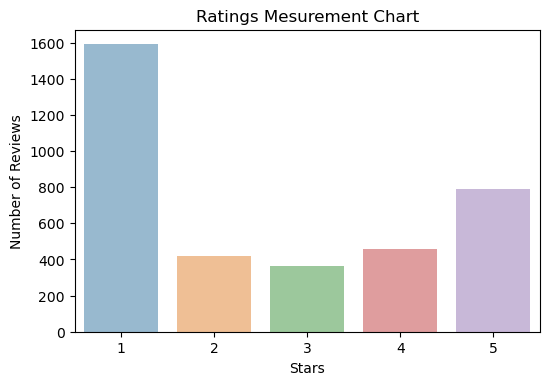

In [18]:
#Create a plot with the ratings on the x-axis and the number of reviews with that rating on the y-axis.

num_r = pd.DataFrame(sub_ratings['stars'].value_counts())

rate_num_allyear = num_r.sort_index()

labels=[1,2,3,4,5]

# Bar Chart

figure4 = plt.subplots(dpi =100)

figure4 = sns.barplot(x = labels, y = rate_num_allyear['stars'],alpha = 0.5)

figure4.set_xlabel('Stars')

figure4.set_ylabel('Number of Reviews')

figure4.set_title('Ratings Mesurement Chart');



Text(0.5, 1.0, 'Number of ratings recieved at each star by Year')

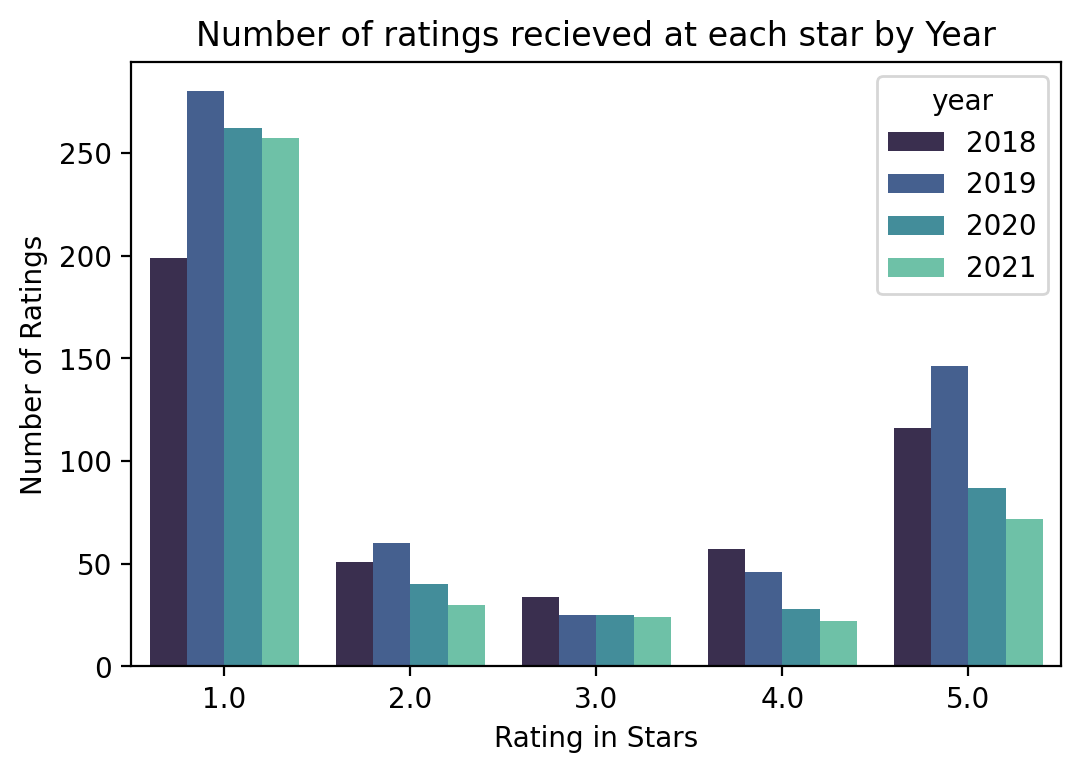

In [19]:
#question4 part B

yr = [2018, 2019, 2020, 2021]
rvw_name_recent = sub_ratings.loc[rvw_name['year'].isin(yr)]

figure4_2 = plt.subplots(dpi = 200)
figure4_2 = sns.countplot(x='stars', hue = 'year', data = rvw_name_recent , palette = "mako")
figure4_2.set_xlabel('Rating in Stars')
figure4_2.set_ylabel('Number of Ratings')
figure4_2.set_title('Number of ratings recieved at each star by Year')

In [20]:
# Question 7

# Question 7

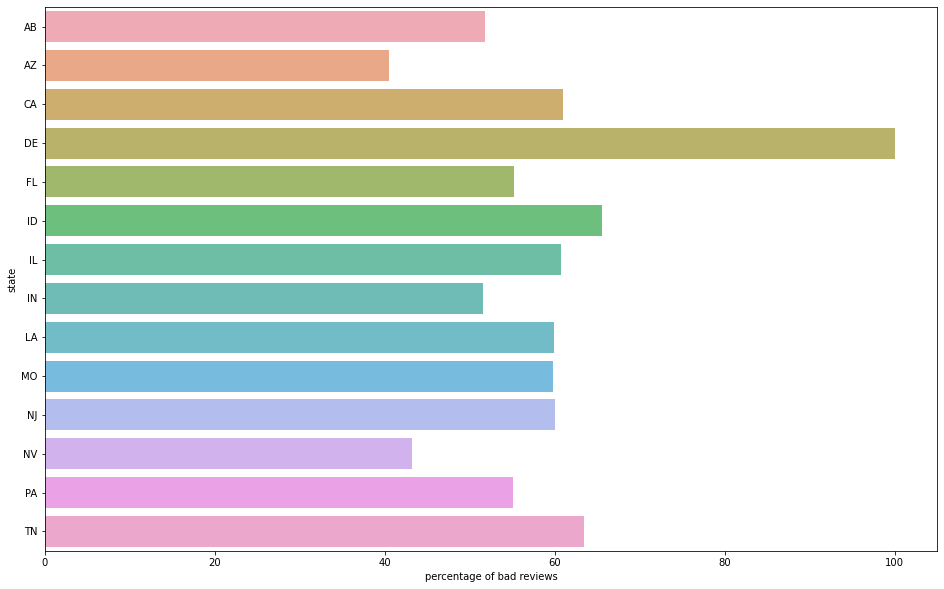

In [21]:
low_rating = rvw_name_recent.loc[rvw_name_recent['stars']==1]

low_rating = low_rating.groupby(low_rating['state']).stars.count().reset_index(name='count')


total = rvw_name_recent.groupby(rvw_name_recent['state']).stars.count().reset_index(name='total')

perc = pd.merge(total,low_rating,how='left', on = 'state')

perc['percentage of bad reviews'] = round(perc['count']/perc['total']*100,2)

figure7_1 = plt.figure(figsize=(16, 10))

figure7_1 = sns.barplot(x='percentage of bad reviews', y='state', data = perc, alpha= 0.8)


#low_rating